## Social Media Computing (CDS-6344)
## Final Assignment
## TT3L
### MUHAMMAD ANIQ FAHMI BIN AZHAR 1211101533
### NUR ALYA NABILAH BINTI MD.NASER 1211101925

In [1]:
from google.colab import files

# Upload file
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

DONWLOAD NLTK

In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
import nltk
!python -m textblob.download_corpora

# Load stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


WE ARE USING 10,000 SAMPLE FROM OUR DATASET

In [4]:
file_path = "Tweets.csv"
df = pd.read_csv(file_path)
df = df.sample(n=10000, random_state=42).reset_index(drop=True)
(df)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,569731104070115329,positive,1.0000,NaN,NaN,Southwest,NaN,JasmineDT,NaN,1,@SouthwestAir you're my early frontrunner for ...,NaN,2015-02-22 21:30:54 -0800,Washington D.C.,Eastern Time (US & Canada)
1,569263373092823040,negative,1.0000,Cancelled Flight,1.0000,US Airways,NaN,ElizabethFrayer,NaN,0,@USAirways how is it that my flt to EWR was Ca...,NaN,2015-02-21 14:32:19 -0800,NaN,NaN
2,568818669024907264,negative,1.0000,Late Flight,0.6770,Delta,NaN,The_Radifier,NaN,0,@JetBlue what is going on with your BDL to DCA...,NaN,2015-02-20 09:05:13 -0800,"Arlington, VA",Atlantic Time (Canada)
3,567775864679456768,neutral,1.0000,NaN,NaN,Delta,NaN,rnlewisjr,NaN,0,@JetBlue do they have to depart from Washingto...,NaN,2015-02-17 12:01:29 -0800,"iPhone: 60.495510,-151.064590",Alaska
4,568526521910079488,negative,0.6625,Customer Service Issue,0.3394,Delta,NaN,beantoon,NaN,0,@JetBlue I can probably find some of them. Are...,NaN,2015-02-19 13:44:20 -0800,"Plymouth, MA",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,570049743549833216,negative,0.6354,Lost Luggage,0.6354,United,NaN,MommyPR,NaN,0,@united GRK13575M is the file reference,NaN,2015-02-23 18:37:04 -0800,Global,Pacific Time (US & Canada)
9996,568815263900180480,positive,1.0000,NaN,NaN,United,NaN,Gouwerijn,NaN,0,@united thnx!,NaN,2015-02-20 08:51:41 -0800,Alphen aan den Rijn,Amsterdam
9997,568799543698935808,positive,1.0000,NaN,NaN,Delta,NaN,SMHillman,NaN,0,@JetBlue gr8 #Mint crew on #flight 123 to #LAX...,NaN,2015-02-20 07:49:13 -0800,"New York, NY",Eastern Time (US & Canada)
9998,570197804091621376,neutral,1.0000,NaN,NaN,American,NaN,garmac87,NaN,0,@AmericanAir hi when will your next set of fli...,NaN,2015-02-24 04:25:24 -0800,northern ireland,NaN


MAP RATINGS TO SENTIMENT

In [5]:
# Load dataset
df = pd.read_csv("Tweets.csv")

# Keep only relevant columns
df = df[['text', 'airline_sentiment']].dropna()

# Take a 10,000-row sample
df = df.sample(n=10000, random_state=42).reset_index(drop=True)

# Rename sentiment column
df.rename(columns={'airline_sentiment': 'Sentiment'}, inplace=True)

# Preview
print(df.shape)
df.head()


(10000, 2)


,text,Sentiment
0,@SouthwestAir you're my early frontrunner for ...,positive
1,@USAirways how is it that my flt to EWR was Ca...,negative
2,@JetBlue what is going on with your BDL to DCA...,negative
3,@JetBlue do they have to depart from Washingto...,neutral
4,@JetBlue I can probably find some of them. Are...,negative


CLEAN TEXT

In [6]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # remove punctuation, symbols
    text = re.sub(r'\s+', ' ', text).strip() # remove extra spaces
    return text

# Apply to the 'text' column, store in new column 'Cleaned'
df['Cleaned'] = df['text'].apply(clean_text)

# Preview
df[['text', 'Cleaned']].head()


,text,Cleaned
0,@SouthwestAir you're my early frontrunner for ...,southwestair youre my early frontrunner for be...
1,@USAirways how is it that my flt to EWR was Ca...,usairways how is it that my flt to ewr was can...
2,@JetBlue what is going on with your BDL to DCA...,jetblue what is going on with your bdl to dca ...
3,@JetBlue do they have to depart from Washingto...,jetblue do they have to depart from washington dc
4,@JetBlue I can probably find some of them. Are...,jetblue i can probably find some of them are t...


LEMMATIZATION USING TEXTBLOB

In [7]:
def lemmatize_text(text):
    words = TextBlob(text).words
    return " ".join([word.lemmatize() for word in words if word not in stop_words])

df['Processed'] = df['Cleaned'].apply(lemmatize_text)
df[['Processed', 'Cleaned']].head()

,Processed,Cleaned
0,southwestair youre early frontrunner best airl...,southwestair youre my early frontrunner for be...
1,usairways flt ewr cancelled flightled yet flts...,usairways how is it that my flt to ewr was can...
2,jetblue going bdl dca flight yesterday today e...,jetblue what is going on with your bdl to dca ...
3,jetblue depart washington dc,jetblue do they have to depart from washington dc
4,jetblue probably find ticket,jetblue i can probably find some of them are t...


ADD SENTIMENT POLARITY FEATURES

In [8]:
# Polarity: ranges from -1 (negative) to 1 (positive)
df['polarity'] = df['Processed'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Subjectivity: ranges from 0 (objective) to 1 (subjective)
df['subjectivity'] = df['Processed'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Word count
df['word_count'] = df['Processed'].apply(lambda x: len(x.split()))

# Preview
df[['Processed', 'polarity', 'subjectivity', 'word_count']].head()


,Processed,polarity,subjectivity,word_count
0,southwestair youre early frontrunner best airl...,0.550000,0.300000,7
1,usairways flt ewr cancelled flightled yet flts...,0.000000,0.000000,11
2,jetblue going bdl dca flight yesterday today e...,-0.071429,0.214286,12
3,jetblue depart washington dc,0.000000,0.000000,4
4,jetblue probably find ticket,0.000000,0.000000,4


TF-IDF VECTORIZATION

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

# Step 1: TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(df['Processed'])

# Step 2: Combine with custom features
X_custom = df[['polarity', 'subjectivity', 'word_count']].values
X = hstack([X_tfidf, X_custom])

# Step 3: Define labels
y = df['Sentiment']




ENCODED THE TARGET VARIABLE

In [10]:
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
y = y.replace(label_mapping)


/tmp/ipython-input-10-1703531815.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(label_mapping)


SPLIT THE DATA

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


HANDLE CLASS IMBALANCE

In [12]:
def apply_smote(X, y, seed=42):
    return SMOTE(random_state=seed).fit_resample(X, y)

X_train_res, y_train_res = apply_smote(X_train, y_train)



### TRADITIONAL ML MODEL

LOGISTIC REGRESSION

In [13]:
log_reg = LogisticRegression()
search_space = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

tuned_lr = GridSearchCV(estimator=log_reg, param_grid=search_space, cv=5, scoring='f1_weighted')
tuned_lr.fit(X_train_res, y_train_res)

y_pred_lr = tuned_lr.best_estimator_.predict(X_test)


NAIVE BAYES

In [14]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_nb, y_train_nb)
y_pred_nb = nb_classifier.predict(X_test_nb)


SVM

In [15]:
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train_res, y_train_res)

y_pred_svm = svm_classifier.predict(X_test)


EVALUATION


--- Logistic Regression Evaluation ---
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1263
           1       0.50      0.58      0.53       416
           2       0.62      0.65      0.64       321

    accuracy                           0.73      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.75      0.73      0.74      2000



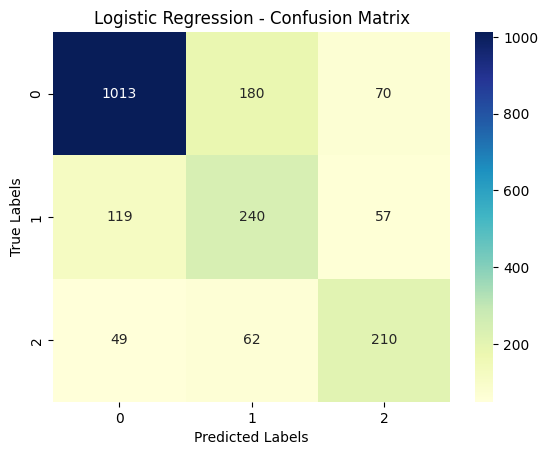


--- Naive Bayes Evaluation ---
              precision    recall  f1-score   support

           0       0.63      0.81      0.71      1263
           1       0.18      0.08      0.11       416
           2       0.14      0.08      0.10       321

    accuracy                           0.54      2000
   macro avg       0.31      0.32      0.31      2000
weighted avg       0.46      0.54      0.49      2000



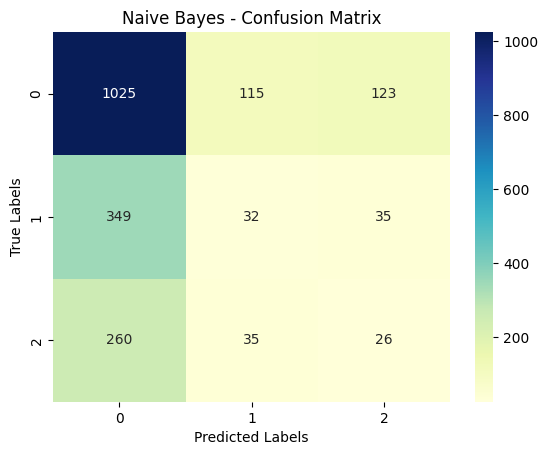


--- SVM (Linear) Evaluation ---
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1263
           1       0.52      0.63      0.57       416
           2       0.63      0.71      0.67       321

    accuracy                           0.75      2000
   macro avg       0.68      0.71      0.69      2000
weighted avg       0.77      0.75      0.76      2000



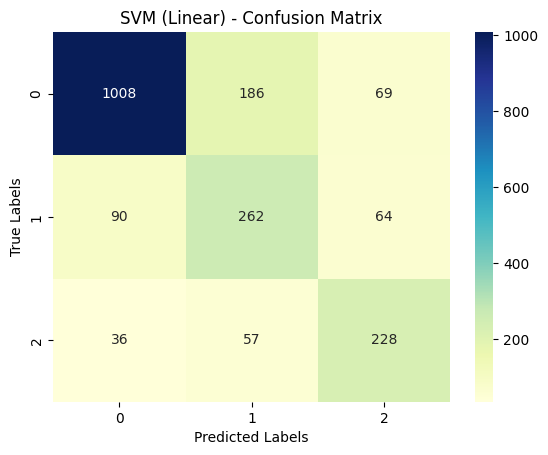

In [16]:
def show_model_results(model_name, actual, predicted):
    from sklearn.metrics import classification_report, confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    print(f"\n--- {model_name} Evaluation ---")
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.ylabel("True Labels")
    plt.xlabel("Predicted Labels")
    plt.show()

show_model_results("Logistic Regression", y_test, y_pred_lr)
show_model_results("Naive Bayes", y_test, y_pred_nb)
show_model_results("SVM (Linear)", y_test, y_pred_svm)


CHECK THE WORD CLOUDS

/tmp/ipython-input-17-1028632846.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Processed'].replace('', np.nan, inplace=True)


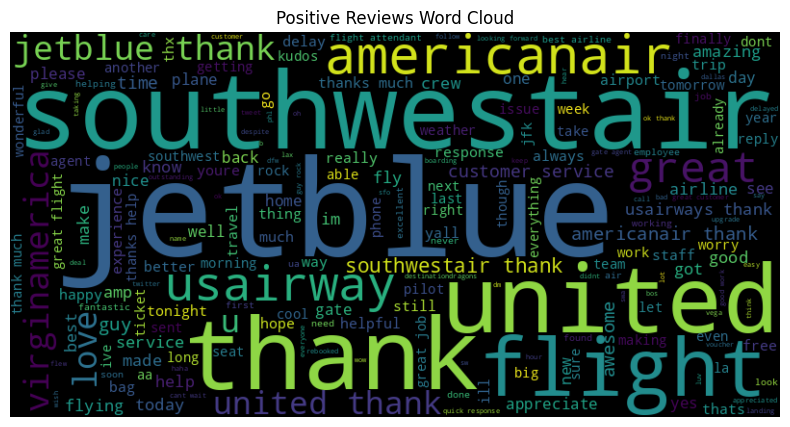

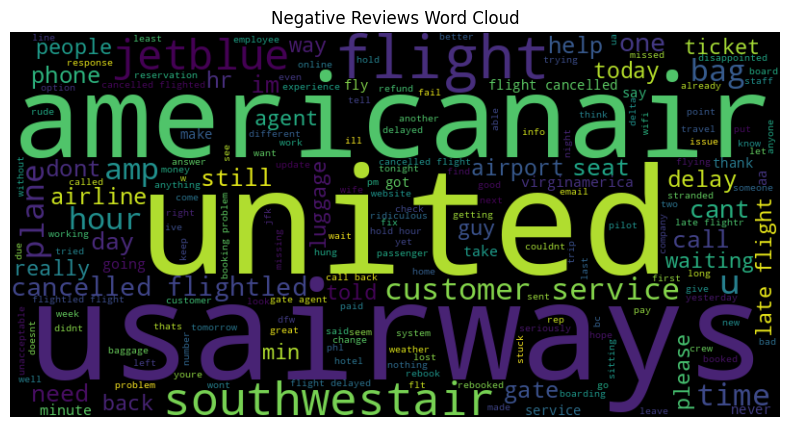

In [17]:
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure 'Sentiment' column is numeric
if df['Sentiment'].dtype == 'object':
    df['Sentiment'] = df['Sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# Ensure 'Processed' column has no empty or null values
df['Processed'].replace('', np.nan, inplace=True)
df.dropna(subset=['Processed'], inplace=True)

# Generate positive word cloud
if not df[df['Sentiment'] == 2].empty:
    pos_text = " ".join(df[df['Sentiment'] == 2]['Processed'])
    wordcloud_pos = WordCloud(width=800, height=400).generate(pos_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_pos, interpolation="bilinear")
    plt.title("Positive Reviews Word Cloud")
    plt.axis("off")
    plt.show()
else:
    print("No positive reviews available to generate word cloud.")

# Generate negative word cloud
if not df[df['Sentiment'] == 0].empty:
    neg_text = " ".join(df[df['Sentiment'] == 0]['Processed'])
    wordcloud_neg = WordCloud(width=800, height=400).generate(neg_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_neg, interpolation="bilinear")
    plt.title("Negative Reviews Word Cloud")
    plt.axis("off")
    plt.show()
else:
    print("No negative reviews available to generate word cloud.")


### DEEP LEARNING MODEL

PREPROCESSING FOR BILSTM

In [18]:
# Step 1: Preprocessing (reusing from earlier)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Filter and map binary labels
df_bilstm = df[df['Sentiment'].isin([0, 2])].copy()
df_bilstm['Sentiment'] = df_bilstm['Sentiment'].map({0: 0, 2: 1})

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_bilstm['Processed'])

sequences = tokenizer.texts_to_sequences(df_bilstm['Processed'])
padded_sequences = pad_sequences(sequences, maxlen=200)

labels = df_bilstm['Sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [19]:
# Step 2: BiLSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=10000, output_dim=64, input_length=200))
bilstm_model.add(Bidirectional(LSTM(64)))
bilstm_model.add(Dense(32, activation='relu'))
bilstm_model.add(Dense(1, activation='sigmoid'))

bilstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
bilstm_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Step 3: Train BiLSTM
bilstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)


Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8290 - loss: 0.4678 - val_accuracy: 0.9101 - val_loss: 0.2388
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9449 - loss: 0.1517 - val_accuracy: 0.9148 - val_loss: 0.2245
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9759 - loss: 0.0747 - val_accuracy: 0.9101 - val_loss: 0.2796
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9901 - loss: 0.0319 - val_accuracy: 0.9038 - val_loss: 0.3106
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9964 - loss: 0.0150 - val_accuracy: 0.9101 - val_loss: 0.3981


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
BiLSTM Classification Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1262
           1       0.75      0.79      0.77       322

    accuracy                           0.91      1584
   macro avg       0.85      0.86      0.86      1584
weighted avg       0.91      0.91      0.91      1584



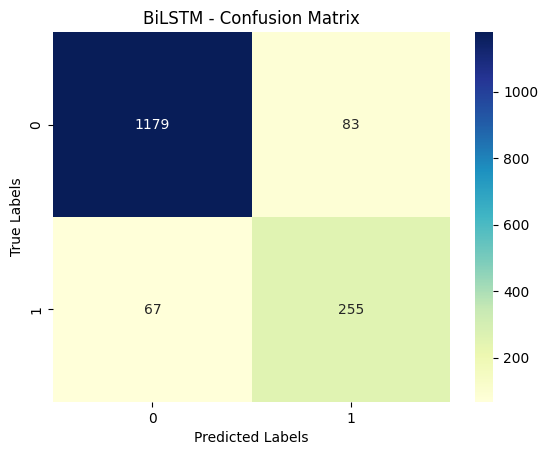

In [21]:
# Step 4: Evaluate BiLSTM
y_pred_bilstm = (bilstm_model.predict(X_test) > 0.5).astype("int32").flatten()
print("BiLSTM Classification Report")
print(classification_report(y_test, y_pred_bilstm))

cm = confusion_matrix(y_test, y_pred_bilstm)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
plt.title("BiLSTM - Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()


## TRANSFORMER-BASED MODEL (LLM)

IMPORT THE IMPORTANT LIBRARIES FOR LLM

In [22]:
!pip install -q transformers datasets

import pandas as pd
import numpy as np
import torch
from sklearn.metrics import classification_report
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from torch.optim import AdamW
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split


PREPARE THE DATASET FOR LLM

In [23]:
# Prepare dataframe: 0 = negative, 1 = neutral, 2 = positive
df_llm = df[df['Sentiment'].isin([0, 1, 2])].copy()
df_llm = df_llm[['Processed', 'Sentiment']].rename(columns={'Processed': 'text', 'Sentiment': 'label'})
train_df, test_df = train_test_split(df_llm, test_size=0.2, random_state=42, stratify=df_llm['label'])

# Tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=max_len)
        self.labels = labels

    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_df['text'], train_df['label'].tolist(), tokenizer)
test_dataset = ReviewDataset(test_df['text'], test_df['label'].tolist(), tokenizer)
# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [24]:
# Model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=3)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = AdamW(model.parameters(), lr=2e-5)


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DEFINE THE TRAINER CONFIGURATION

In [25]:
# Training Loop
model.train()
for epoch in range(3):
    total_loss = 0
    for batch in train_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print(f"Epoch {epoch + 1} - Loss: {total_loss:.4f}")


Epoch 1 - Loss: 315.0389
Epoch 2 - Loss: 211.0072
Epoch 3 - Loss: 143.5878


DistilBERT Classification Report
              precision    recall  f1-score   support

    Negative       0.86      0.91      0.89      1263
     Neutral       0.63      0.62      0.63       416
    Positive       0.79      0.65      0.71       321

    accuracy                           0.81      2000
   macro avg       0.76      0.73      0.74      2000
weighted avg       0.80      0.81      0.80      2000



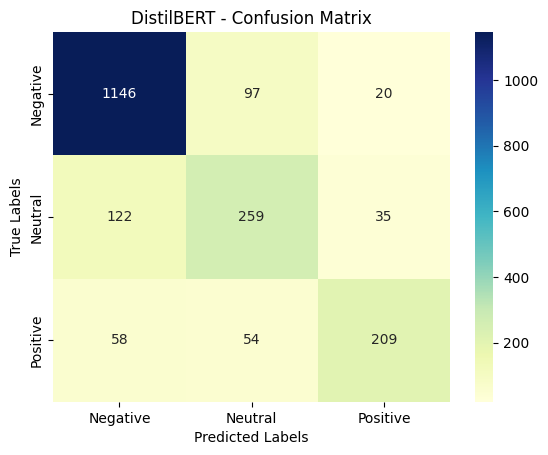

In [26]:
# Evaluation
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        labels = batch['labels'].cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels)

print("DistilBERT Classification Report")
print(classification_report(all_labels, all_preds, target_names=["Negative", "Neutral", "Positive"]))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.title("DistilBERT - Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()


BERT

In [27]:
from transformers import BertTokenizerFast, BertForSequenceClassification
from torch.optim import AdamW

# Tokenizer and Model
bert_tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
bert_model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3).to(device)

# Tokenize data
train_dataset_bert = ReviewDataset(train_df['text'], train_df['label'].tolist(), bert_tokenizer)
test_dataset_bert = ReviewDataset(test_df['text'], test_df['label'].tolist(), bert_tokenizer)
train_loader_bert = DataLoader(train_dataset_bert, batch_size=16, shuffle=True)
test_loader_bert = DataLoader(test_dataset_bert, batch_size=16)

# Optimizer
optimizer_bert = AdamW(bert_model.parameters(), lr=2e-5)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TRAINING WITH BERT

In [28]:
bert_model.train()
for epoch in range(3):
    total_loss = 0
    for batch in train_loader_bert:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = bert_model(**batch)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer_bert.step()
        optimizer_bert.zero_grad()
    print(f"BERT Epoch {epoch+1} - Loss: {total_loss:.4f}")

BERT Epoch 1 - Loss: 305.5208
BERT Epoch 2 - Loss: 206.3269
BERT Epoch 3 - Loss: 131.9272


EVALUATION

BERT Classification Report
              precision    recall  f1-score   support

    Negative       0.85      0.93      0.88      1263
     Neutral       0.65      0.56      0.60       416
    Positive       0.77      0.63      0.70       321

    accuracy                           0.80      2000
   macro avg       0.76      0.71      0.73      2000
weighted avg       0.79      0.80      0.80      2000



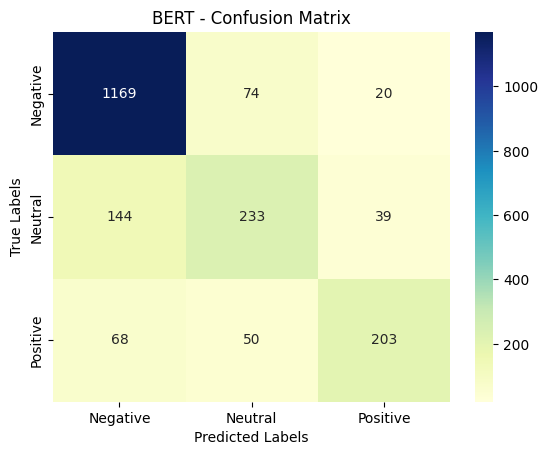

In [29]:
bert_model.eval()
bert_preds, bert_labels = [], []
with torch.no_grad():
    for batch in test_loader_bert:
        batch = {k: v.to(device) for k, v in batch.items()}
        logits = bert_model(**batch).logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        labels = batch["labels"].cpu().numpy()
        bert_preds.extend(preds)
        bert_labels.extend(labels)

# Classification Report
print("BERT Classification Report")
print(classification_report(bert_labels, bert_preds, target_names=["Negative", "Neutral", "Positive"]))

# Confusion Matrix
cm = confusion_matrix(bert_labels, bert_preds)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.title("BERT - Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

ROBERTA

PREPARING THE MODEL

In [30]:
from transformers import RobertaTokenizerFast, RobertaForSequenceClassification

# Tokenizer and Model
roberta_tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")
roberta_model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3).to(device)

# Tokenize data
train_dataset_roberta = ReviewDataset(train_df['text'], train_df['label'].tolist(), roberta_tokenizer)
test_dataset_roberta = ReviewDataset(test_df['text'], test_df['label'].tolist(), roberta_tokenizer)
train_loader_roberta = DataLoader(train_dataset_roberta, batch_size=16, shuffle=True)
test_loader_roberta = DataLoader(test_dataset_roberta, batch_size=16)

# Optimizer
optimizer_roberta = AdamW(roberta_model.parameters(), lr=2e-5)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TRAIN THE MODEL

In [31]:
roberta_model.train()
for epoch in range(3):
    total_loss = 0
    for batch in train_loader_roberta:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = roberta_model(**batch)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer_roberta.step()
        optimizer_roberta.zero_grad()
    print(f"RoBERTa Epoch {epoch+1} - Loss: {total_loss:.4f}")

RoBERTa Epoch 1 - Loss: 293.5572
RoBERTa Epoch 2 - Loss: 222.1920
RoBERTa Epoch 3 - Loss: 179.9463


EVALUATION

RoBERTa Classification Report
              precision    recall  f1-score   support

    Negative       0.86      0.93      0.89      1263
     Neutral       0.66      0.57      0.61       416
    Positive       0.81      0.68      0.74       321

    accuracy                           0.81      2000
   macro avg       0.77      0.73      0.75      2000
weighted avg       0.81      0.81      0.81      2000



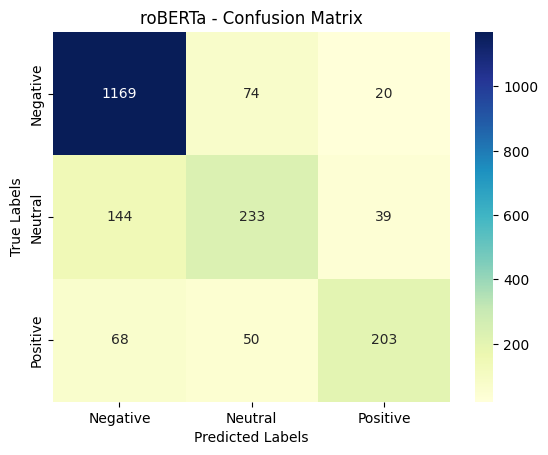

In [32]:
roberta_model.eval()
roberta_preds, roberta_labels = [], []
with torch.no_grad():
    for batch in test_loader_roberta:
        batch = {k: v.to(device) for k, v in batch.items()}
        logits = roberta_model(**batch).logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        labels = batch["labels"].cpu().numpy()
        roberta_preds.extend(preds)
        roberta_labels.extend(labels)

print("RoBERTa Classification Report")
print(classification_report(roberta_labels, roberta_preds, target_names=["Negative", "Neutral", "Positive"]))

# Confusion Matrix
cm = confusion_matrix(bert_labels, bert_preds)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d",
            xticklabels=["Negative", "Neutral", "Positive"],
            yticklabels=["Negative", "Neutral", "Positive"])
plt.title("roBERTa - Confusion Matrix")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

## WE COMPARE THE MODEL PERFORMANCE THAT WE USED

In [33]:
import pandas as pd

# Define model performance manually based on your screenshots
results = {
    "Logistic Regression": {"Accuracy": 0.73,},
    "Naive Bayes": {"Accuracy": 0.54,},
    "SVM": {"Accuracy": 0.75,},
    "BiLSTM": {"Accuracy": 0.91, },
    "DistilBERT": {"Accuracy": 0.81},
    "BERT": {"Accuracy": 0.80},
    "RoBERTa": {"Accuracy": 0.81}
}

# Convert to DataFrame
df_results = pd.DataFrame(results).T.reset_index().rename(columns={"index": "Model"})
df_results


,Model,Accuracy
0,Logistic Regression,0.73
1,Naive Bayes,0.54
2,SVM,0.75
3,BiLSTM,0.91
4,DistilBERT,0.81
5,BERT,0.80
6,RoBERTa,0.81


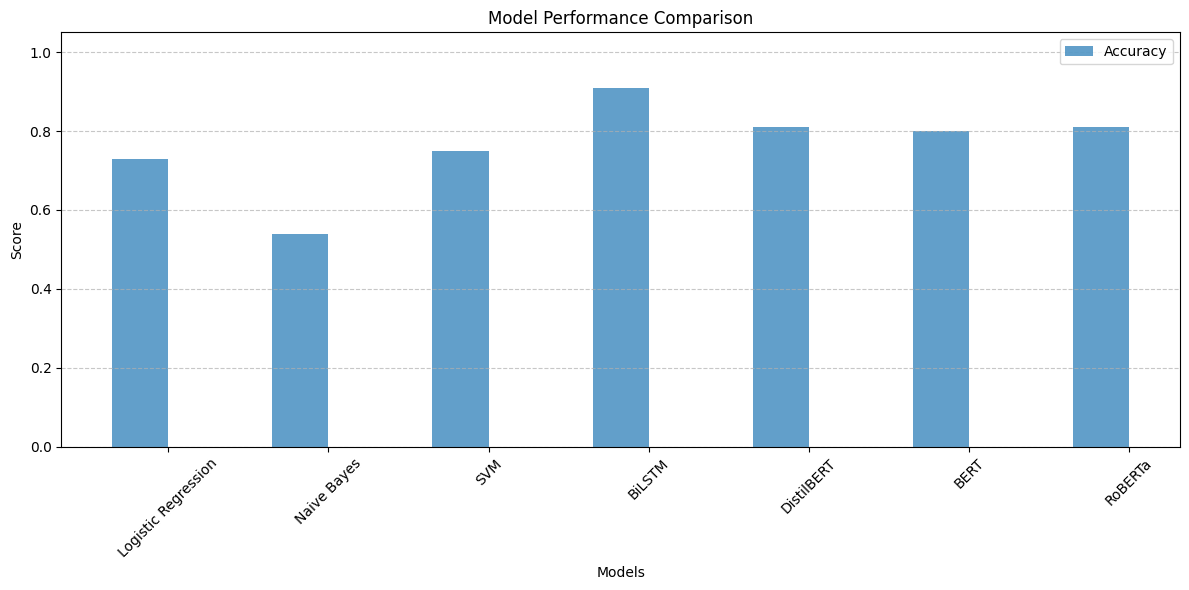

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(df_results))

# Bars for Accuracy and F1
plt.bar(index, df_results["Accuracy"], bar_width, label="Accuracy", alpha=0.7)

# Labels and formatting
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks([i + bar_width / 2 for i in index], df_results["Model"], rotation=45)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
